In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

filepath_list = [
    "data/results/destination_pred/results_22_07_2021__15_26__2_12.csv",
    "data/results/destination_pred/results_22_07_2021__14_07__6_8.csv",
    "data/results/destination_pred/results_22_07_2021__08_54__3_10.csv",
    "data/results/destination_pred/results_20_07_2021__16_17__3_7.csv",
    "data/results/destination_pred/results_30_07_2021__01_25__3_11.csv", # lstm layer size
    "data/results/destination_pred/results_31_07_2021__00_22__3_11.csv", # lstm and dense layer size
    "data/results/destination_pred/results_31_07_2021__10_37__3_11.csv", # num lstm and dense layers
    "data/results/destination_pred/results_31_07_2021__15_05__3_11.csv" # num input/ output points
    ]

def load_input_list(filepath_list):
    kpi_dataframe = None
    for filepath in filepath_list:
        try:
            new_frame = pd.read_csv(filepath)
            kpi_dataframe = pd.DataFrame.append(kpi_dataframe, new_frame)
        except:
            kpi_dataframe = pd.read_csv(filepath)
    return kpi_dataframe

kpi_dataframe = load_input_list(filepath_list=filepath_list)

# Different plots to be created
1. KPI vs input length // varying n -- maybe also plot number of training samples on second axis
2. KPI vs output length // varying n -- maybe also plot number of training samples on second axis
3. KPI vs features // varying n
4. KPI vs num dense units
5. KPI vs n // best fixed vs variable length network

kpi_dataframe.head()

In [47]:
# Function to create a dict containing all the inputs for plotting

def return_input_dict(num_in_steps, num_out_steps, n, 
dests_incl, all_points_incl, n_conn_points_incl, num_lstm_lay,
num_dense_lay, lstm_lay_size, dense_lay_size, var_in_len):
    ''' For mapping the fixed values against the column titles 
    Set value to None if it is not to be fixed'''
    out_dict = dict()
    out_dict["num_in_steps"] = num_in_steps
    out_dict["num_out_steps"] = num_out_steps
    out_dict["n"] = n
    out_dict["dests_included"] = dests_incl
    out_dict["all_points_included"] = all_points_incl
    out_dict["n_conn_points_included"] = n_conn_points_incl
    out_dict["num_lstm_layers"] = num_lstm_lay
    out_dict["num_dense_layers"] = num_dense_lay
    out_dict["lstm_layer_size"] = lstm_lay_size
    out_dict["dense_layer_size"] = dense_lay_size
    out_dict["var_in_len"] = var_in_len

    return out_dict

In [3]:
df_c=kpi_dataframe.copy()

In [4]:
df_c[df_c["n"].isin([5,9])]

,n,ADE,FDE,counter,not_counter,num_in_steps,num_out_steps,dests_included,all_points_included,n_conn_points_included,num_lstm_layers,num_dense_layers,lstm_layer_size,dense_layer_size,var_in_len
1,5,3.033989,4.611729,1867,0,2,12,False,False,False,2,2,64,64,False
2,9,4.254160,7.024034,1867,0,2,12,False,False,False,2,2,64,64,False
4,5,2.703064,4.415110,1867,0,2,12,False,True,False,2,2,64,64,False
5,9,4.118744,7.172764,1867,0,2,12,False,True,False,2,2,64,64,False
7,5,2.887719,4.388324,1867,0,2,12,False,False,True,2,2,64,64,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,9,4.881440,13.763727,2205,0,3,8,True,True,False,2,2,256,32,False
64,5,2.396190,3.662942,2205,0,3,8,True,True,False,2,2,32,128,False
65,9,4.603107,13.270772,2205,0,3,8,True,True,False,2,2,32,128,False
67,5,2.368790,3.732943,2205,0,3,8,True,True,False,2,2,128,128,False


<ipython-input-44-df83a8593448>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["n"] = fix_df["n"] * time_per_step
<ipython-input-44-df83a8593448>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
<ipython-input-44-df83a8593448>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

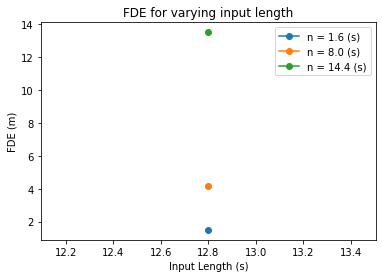

In [44]:
# 1. KPI vs input length

def plot_graph1(df, time_per_step = 1.44, KPI="FDE", num_in_steps=[2,3,7], n=[1,2,3,5,9], num_out_steps = 8, 
dests_incl=False, all_points_incl=False, n_conn_points_incl=False, num_lstm_lay=2,
num_dense_lay=2, lstm_lay_size=64, dense_lay_size=64, var_in_len=False, save_path=None):
    # Easy access to vars that change per function made 
    x_col_name = "num_out_steps"
    y_col_name = KPI
    fixed_col_name = "n"
    
    # copy the df
    df_c = df.copy()

    # Create the graph
    fig, ax = plt.subplots()

    # Set axes labels, title...
    ax.set_title(KPI + " for varying input length")
    ax.set_ylabel(KPI + " (m)")
    ax.set_xlabel("Input Length" + " (s)")

    # Create the dict that will map the fixed values 
    input_dict = return_input_dict(num_in_steps=None, num_out_steps=num_out_steps, n=n, 
    dests_incl=dests_incl, all_points_incl=all_points_incl, n_conn_points_incl=n_conn_points_incl, num_lstm_lay=num_lstm_lay,
    num_dense_lay=num_dense_lay, lstm_lay_size=lstm_lay_size, dense_lay_size=dense_lay_size, var_in_len=var_in_len)
    
    # Filter the DF to contain the needed information 
    for key, value in input_dict.items():
        if value is not None:
            if type(value)==list:
                df_c = df_c[df_c[key].isin(value)]
            else:
                df_c = df_c[df_c[key]==value]
    # Plot the values
    legend_list = []
    for n_val in n:
        fix_df = df_c[df_c[fixed_col_name]==n_val]

        if len(fix_df) > 0:
            # keep legend list in order
            legend_list.append(n_val)

            # get the time axis in order
            # fix_df[fixed_col_name] = fix_df[fixed_col_name] * time_per_step
            fix_df["n"] = fix_df["n"] * time_per_step
            fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
            fix_df["num_out_steps"] = fix_df["num_out_steps"] * time_per_step

            # extract and sort numpy
            xy = fix_df[[x_col_name, y_col_name]].to_numpy()
            xy = xy[xy[:, 0].argsort()]

            # plot
            ax.plot(xy[:,0], xy[:,1], marker="o")

    ''' ONLY IF THE FIXED COL NEEDS TO BE ADJUSTED FOR TIME!!! '''
    if fixed_col_name == "n" or fixed_col_name == "num_in_steps" or fixed_col_name == "num_out_steps":
        legend_list = [x*time_per_step for x in legend_list]

    # set the legend
    for i in range(len(legend_list)):   
        legend_list[i] = fixed_col_name + " = " + str(legend_list[i]) + " (s)"
    ax.legend(legend_list)

    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')
        
plot_graph1(kpi_dataframe)

<ipython-input-14-2c9b8deede44>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["n"] = fix_df["n"] * time_per_step
<ipython-input-14-2c9b8deede44>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
<ipython-input-14-2c9b8deede44>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

False

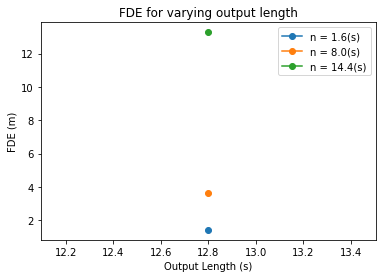

In [14]:
# 2. KPI vs output length

def plot_graph2(df, time_per_step = 1.44, KPI="FDE", num_out_steps = [7,10],  n=[1,2,3,5,9], num_in_steps=3,
dests_incl=True, all_points_incl=True, n_conn_points_incl=True, num_lstm_lay=2,
num_dense_lay=2, lstm_lay_size=32, dense_lay_size=32, var_in_len=False, save_path=None):
    # Easy access to vars that change per function made 
    x_col_name = "num_out_steps"
    y_col_name = KPI
    fixed_col_name = "n"

    # copy the df
    df_c = df.copy()

    # Create the graph
    fig, ax = plt.subplots()

    # Set axes labels, title...
    ax.set_title(KPI + " for varying output length")
    ax.set_ylabel(KPI + " (m)")
    ax.set_xlabel("Output Length" + " (s)")

    # Create the dict that will map the fixed values 
    input_dict = return_input_dict(num_in_steps=num_in_steps, num_out_steps=None, n=n, 
    dests_incl=dests_incl, all_points_incl=all_points_incl, n_conn_points_incl=n_conn_points_incl, num_lstm_lay=num_lstm_lay,
    num_dense_lay=num_dense_lay, lstm_lay_size=lstm_lay_size, dense_lay_size=dense_lay_size, var_in_len=var_in_len)
    
    # Filter the DF to contain the needed information 
    for key, value in input_dict.items():
        if value is not None:
            if type(value)==list:
                df_c = df_c[df_c[key].isin(value)]
            else:
                df_c = df_c[df_c[key]==value]


    # Plot the values
    legend_list = []
    for n_val in n:
        fix_df = df_c[df_c[fixed_col_name]==n_val]

        if len(fix_df) > 0:
            # keep legend list in order
            legend_list.append(n_val)

            # get the time axis in order
            # fix_df[fixed_col_name] = fix_df[fixed_col_name] * time_per_step
            fix_df["n"] = fix_df["n"] * time_per_step
            fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
            fix_df["num_out_steps"] = fix_df["num_out_steps"] * time_per_step

            # extract and sort numpy
            xy = fix_df[[x_col_name, y_col_name]].to_numpy()
            xy = xy[xy[:, 0].argsort()]

            # plot
            ax.plot(xy[:,0], xy[:,1], marker="o")

    ''' ONLY IF THE FIXED COL NEEDS TO BE ADJUSTED FOR TIME!!! '''
    if fixed_col_name == "n" or fixed_col_name == "num_in_steps" or fixed_col_name == "num_out_steps":
        legend_list = [x*time_per_step for x in legend_list]

    # set the legend
    for i in range(len(legend_list)):   
        legend_list[i] = fixed_col_name + " = " + str(legend_list[i]) + " (s)"
    ax.legend(legend_list)

    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')

    return False

plot_graph2(kpi_dataframe)

[2.062562868412368, 4.611728604227706, 7.024034314185065]
[1.813470025627929, 4.3329834584223885, 6.5589773668593025]
[1.7100582153086654, 4.415110372909805, 7.172764280190673]
[2.048887802308637, 4.388323635610963, 7.256717526846197]


False

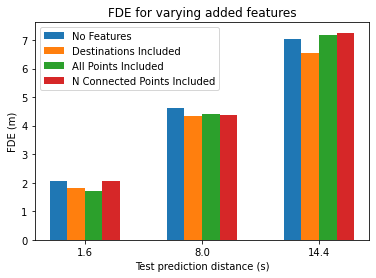

In [53]:
# 3. KPI vs features // fixed n

def plot_graph3(df, time_per_step = 1.44, KPI="FDE", num_out_steps = 12,  n=[1,5,9], num_in_steps=2,
dests_incl=True, all_points_incl=True, n_conn_points_incl=True, num_lstm_lay=2,
num_dense_lay=2, lstm_lay_size=64, dense_lay_size=64, var_in_len=False, save_path="features.png"):
    # Easy access to vars that change per function made 
    x_col_name = None
    y_col_name = KPI
    fixed_col_name = "n"

    # copy the df
    df_c = df.copy()

    # Create the graph
    fig, ax = plt.subplots()

    # Set axes labels, title...
    ax.set_title(KPI + " for varying added features")
    ax.set_ylabel(KPI + " (m)")
    ax.set_xlabel("Test prediction distance" + " (s)")

    # Create the dict that will map the fixed values 
    input_dict = return_input_dict(num_in_steps=num_in_steps, num_out_steps=num_out_steps, n=n, 
    dests_incl=None, all_points_incl=None, n_conn_points_incl=None, num_lstm_lay=num_lstm_lay,
    num_dense_lay=num_dense_lay, lstm_lay_size=lstm_lay_size, dense_lay_size=dense_lay_size, var_in_len=var_in_len)
    
    # Filter the DF to contain the needed information 
    for key, value in input_dict.items():
        if value is not None:
            if type(value)==list:
                df_c = df_c[df_c[key].isin(value)]
            else:
                df_c = df_c[df_c[key]==value]


    # Plot the values
    def return_filtered_by_feat(df, dests_incl, all_points_incl, n_conn_points_incl):
        df_c = df.copy()
        df_c=df_c[df_c["dests_included"]==dests_incl]
        df_c=df_c[df_c["all_points_included"]==all_points_incl]
        df_c=df_c[df_c["n_conn_points_included"]==n_conn_points_incl]

        return df_c

    legend_list = n
    lst_no_features = []
    lst_dests_incl = []
    lst_all_points_incl = []
    lst_n_conn_points_incl = []

    for n_val in n:
        fix_df = df_c[df_c[fixed_col_name]==n_val]

        # no features included
        df_local = return_filtered_by_feat(fix_df, False, False, False)
        if len(df_local) > 0:
            val = df_local.iloc[0][KPI]
            lst_no_features.append(val)
        else:
            lst_no_features.append(0.)

        # destinations included
        df_local = return_filtered_by_feat(fix_df, True, False, False)
        if len(df_local) > 0:
            val = df_local.iloc[0][KPI]
            lst_dests_incl.append(val)
        else:
            lst_dests_incl.append(0.)

        # lst_all_points_incl included
        df_local = return_filtered_by_feat(fix_df, False, True, False)
        if len(df_local) > 0:
            val = df_local.iloc[0][KPI]
            lst_all_points_incl.append(val)
        else:
            lst_all_points_incl.append(0.)

        # lst_n_conn_points_incl included
        df_local = return_filtered_by_feat(fix_df, False, False, True)
        if len(df_local) > 0:
            val = df_local.iloc[0][KPI]
            lst_n_conn_points_incl.append(val)
        else:
            lst_n_conn_points_incl.append(0.)

    # prints for debug
    print(lst_no_features)
    print(lst_dests_incl)
    print(lst_all_points_incl)
    print(lst_n_conn_points_incl)

    ''' ONLY IF THE FIXED COL NEEDS TO BE ADJUSTED FOR TIME!!! '''
    if fixed_col_name == "n" or fixed_col_name == "num_in_steps" or fixed_col_name == "num_out_steps":
        legend_list = [x*time_per_step for x in legend_list]

    # Make the plot    
    x = np.arange(len(legend_list))  # the label locations
    width = 0.45  # the width of the bars
    rects1 = ax.bar(x - 1.5*width/3, lst_no_features, width/3, label='No Features')
    rects2 = ax.bar(x - .5*width/3, lst_dests_incl, width/3, label='Destinations Included')
    rects3 = ax.bar(x + .5*width/3, lst_all_points_incl, width/3, label='All Points Included')
    rects4 = ax.bar(x + 1.5*width/3, lst_n_conn_points_incl, width/3, label='N Connected Points Included')

    # Set title and labels
    ax.set_xticks(x)
    ax.set_xticklabels(legend_list)
    ax.legend()

    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')

    return False

plot_graph3(kpi_dataframe)

<ipython-input-52-f483d7de4e57>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["n"] = fix_df["n"] * time_per_step
<ipython-input-52-f483d7de4e57>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
<ipython-input-52-f483d7de4e57>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

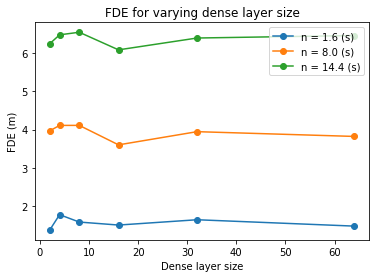

In [52]:
# 4. KPI vs num dense units // fixed n

def plot_graph4(df, time_per_step = 1.44, KPI="FDE", num_in_steps=3, n=[1,5,9], num_out_steps = 11, 
dests_incl=False, all_points_incl=False, n_conn_points_incl=False, num_lstm_lay=2,
num_dense_lay=2, lstm_lay_size=32, dense_lay_size=[2, 4, 8, 16, 32, 64], var_in_len=False, save_path="dense_units.png"):
    # Easy access to vars that change per function made 
    x_col_name = "dense_layer_size"
    y_col_name = KPI
    fixed_col_name = "n"
    
    # copy the df
    df_c = df.copy()

    # Create the graph
    fig, ax = plt.subplots()

    # Set axes labels, title...
    ax.set_title(KPI + " for varying dense layer size")
    ax.set_ylabel(KPI + " (m)")
    ax.set_xlabel("Dense layer size")

    # Create the dict that will map the fixed values 
    input_dict = return_input_dict(num_in_steps=num_in_steps, num_out_steps=num_out_steps, n=n, 
    dests_incl=dests_incl, all_points_incl=all_points_incl, n_conn_points_incl=n_conn_points_incl, num_lstm_lay=num_lstm_lay,
    num_dense_lay=num_dense_lay, lstm_lay_size=lstm_lay_size, dense_lay_size=None, var_in_len=var_in_len)
    
    # Filter the DF to contain the needed information 
    for key, value in input_dict.items():
        if value is not None:
            if type(value)==list:
                df_c = df_c[df_c[key].isin(value)]
            else:
                df_c = df_c[df_c[key]==value]
    # Plot the values
    legend_list = []
    for n_val in n:
        fix_df = df_c[df_c[fixed_col_name]==n_val]

        if len(fix_df) > 0:
            # keep legend list in order
            legend_list.append(n_val)

            # get the time axis in order
            # fix_df[fixed_col_name] = fix_df[fixed_col_name] * time_per_step
            fix_df["n"] = fix_df["n"] * time_per_step
            fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
            fix_df["num_out_steps"] = fix_df["num_out_steps"] * time_per_step

            # extract and sort numpy
            xy = fix_df[[x_col_name, y_col_name]].to_numpy()
            xy = xy[xy[:, 0].argsort()]

            # plot
            ax.plot(xy[:,0], xy[:,1], marker="o")

    ''' ONLY IF THE FIXED COL NEEDS TO BE ADJUSTED FOR TIME!!! '''
    if fixed_col_name == "n" or fixed_col_name == "num_in_steps" or fixed_col_name == "num_out_steps":
        legend_list = [x*time_per_step for x in legend_list]

    # set the legend
    for i in range(len(legend_list)):   
        legend_list[i] = fixed_col_name + " = " + str(legend_list[i]) + " (s)"
    ax.legend(legend_list)

    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')
      
plot_graph4(kpi_dataframe)

<ipython-input-63-048bb6b6dee2>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["num_lstm_layers"]==num_lstm]
<ipython-input-63-048bb6b6dee2>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["n"]==n]
<ipython-input-63-048bb6b6dee2>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["num_lstm_layers"]==num_lstm]
<ipython-input-63-048bb6b6dee2>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["n"]==n]
<ipython-input-63-048bb6b6dee2>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["num_lstm_layers"]==num_lstm]
<ipython-input-63-048bb6b6dee2>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["n"]==n]
<ipython-input-63-048bb6b6dee2>:22: UserWarning: Boolean Seri

[[6.40931562 6.39208941 6.57956878 6.8300098 ]
 [6.40608086 6.51394488 6.16523904 6.66357116]
 [6.78595294 6.78889504 6.77196117 6.79560745]
 [7.74244452 7.07485254 7.45441043 6.97547887]]


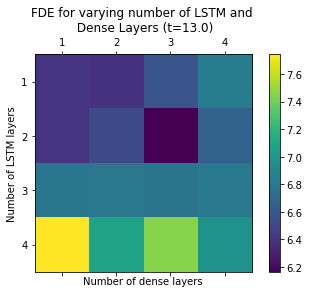

In [63]:
# 6. Number of LSTM and Dense layers


def plot_graph6(df, time_per_step = 1.44, KPI="FDE", num_in_steps=3, n=9, num_out_steps = 11, 
dests_incl=False, all_points_incl=False, n_conn_points_incl=False, num_lstm_lay=[1,2,3,4],
num_dense_lay=[1,2,3,4], lstm_lay_size=[], dense_lay_size=[], var_in_len=False, save_path="num_layers_n9.png"):
    # Easy access to vars that change per function made 
    x_col_name = "Number dense layers"
    y_col_name = "Number LSTM layers"
    fixed_col_name = KPI
    
    # copy the df
    df_c = df.copy()

    # create a matrix out of the copy df
    plot_mat = np.zeros((len(num_lstm_lay), len(num_dense_lay)))

    for ind_dense, num_dense in zip(range(len(num_dense_lay)),num_dense_lay):
        for ind_lstm, num_lstm in zip(range(len(num_lstm_lay)),num_lstm_lay):
            # get value
            filt_df = df_c[df_c["num_dense_layers"]==num_dense]
            filt_df = filt_df[df_c["num_lstm_layers"]==num_lstm]
            filt_df = filt_df[df_c["n"]==n]
            
            # put value into plot mat
            plot_mat[ind_lstm, ind_dense] = filt_df[KPI]

    print(plot_mat)
    # Create the graph
    fig, ax = plt.subplots()
    cax = ax.matshow(plot_mat)
    fig.colorbar(cax)

    # Set correct axis labels
    ax.set_xticklabels([0] + num_dense_lay)
    ax.set_yticklabels([0] + num_lstm_lay)

    # Set axes labels, title...
    time = round(n*time_per_step,1)
    ax.set_title(KPI + " for varying number of LSTM and \n Dense Layers (t=" + str(time) + ")")
    ax.set_ylabel("Number of LSTM layers")
    ax.set_xlabel("Number of dense layers")

    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')

df_lstm_dense = load_input_list(["data/results/destination_pred/results_31_07_2021__10_37__3_11.csv"])
plot_graph6(df_lstm_dense)

<ipython-input-60-5a60366bb36f>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["lstm_layer_size"]==num_lstm]
<ipython-input-60-5a60366bb36f>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["n"]==n]
<ipython-input-60-5a60366bb36f>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["lstm_layer_size"]==num_lstm]
<ipython-input-60-5a60366bb36f>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["n"]==n]
<ipython-input-60-5a60366bb36f>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["lstm_layer_size"]==num_lstm]
<ipython-input-60-5a60366bb36f>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filt_df = filt_df[df_c["n"]==n]
<ipython-input-60-5a60366bb36f>:20: UserWarning: Boolean Seri

[[1.32941376 1.88717111 1.46185836 1.62165778 2.01164233 1.55556984]
 [1.68172747 1.55216425 2.01149096 1.43210526 1.85870408 1.46212433]
 [1.68114527 1.62958808 1.49121594 1.60082392 1.50418048 1.84678363]
 [2.13791519 1.6884087  1.56997522 1.87284068 1.49965231 2.03249822]
 [1.54329068 1.56191866 1.67083767 1.52175813 1.62546908 1.61493633]
 [1.27981348 1.5552465  1.52546242 1.88531451 1.7332737  1.5194221 ]]


<ipython-input-60-5a60366bb36f>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0] + dense_lay_size)
<ipython-input-60-5a60366bb36f>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0] + lstm_lay_size)


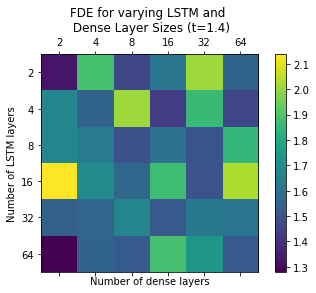

In [60]:
# 7. KPI vs units per layer

def plot_graph7(df, time_per_step = 1.44, KPI="FDE", n=1, 
lstm_lay_size=[2, 4, 8, 16, 32, 64], dense_lay_size=[2, 4, 8, 16, 32, 64], save_path="layer_sizes_n1.png"):
    # Easy access to vars that change per function made 
    x_col_name = "Number dense layers"
    y_col_name = "Number LSTM layers"
    fixed_col_name = KPI
    
    # copy the df
    df_c = df.copy()

    # create a matrix out of the copy df
    plot_mat = np.zeros((len(lstm_lay_size), len(dense_lay_size)))

    for ind_dense, num_dense in zip(range(len(dense_lay_size)),dense_lay_size):
        for ind_lstm, num_lstm in zip(range(len(lstm_lay_size)),lstm_lay_size):
            # get value
            filt_df = df_c[df_c["dense_layer_size"]==num_dense]
            filt_df = filt_df[df_c["lstm_layer_size"]==num_lstm]
            filt_df = filt_df[df_c["n"]==n]
            
            # put value into plot mat
            plot_mat[ind_lstm, ind_dense] = filt_df[KPI]

    print(plot_mat)
    # Create the graph
    fig, ax = plt.subplots()
    cax = ax.matshow(plot_mat)
    fig.colorbar(cax)

    # Set correct axis labels
    ax.set_xticklabels([0] + dense_lay_size)
    ax.set_yticklabels([0] + lstm_lay_size)

    # Set axes labels, title...
    time = round(n*time_per_step, 1)
    ax.set_title(KPI + " for varying LSTM and \n Dense Layer Sizes (t=" + str(time) + ")")
    ax.set_ylabel("Number of LSTM layers")
    ax.set_xlabel("Number of dense layers")
    
    # save graph
    if save_path is not None:
        save_path = "data/images/path_pred_result/" + save_path
        plt.gcf()
        plt.savefig(save_path, bbox_inches='tight')

df_lstm_dense = load_input_list(["data/results/destination_pred/results_31_07_2021__00_22__3_11.csv"])
plot_graph7(df_lstm_dense)

<ipython-input-57-e0ec8405a01b>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["n"] = fix_df["n"] * time_per_step
<ipython-input-57-e0ec8405a01b>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
<ipython-input-57-e0ec8405a01b>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

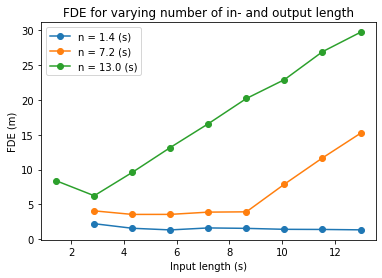

In [57]:
# 8. Changing input and output length

def plot_graph8(df, time_per_step = 1.44, KPI="FDE", num_in_steps=[1,2,3,4,5,6,7,8,9], n=[1,5,9], num_out_steps = 11, 
dests_incl=True, all_points_incl=False, n_conn_points_incl=False, num_lstm_lay=2,
num_dense_lay=2, lstm_lay_size=32, dense_lay_size=32, var_in_len=False, save_path="inp_outp_size.png"):
    # Easy access to vars that change per function made 
    x_col_name = "num_in_steps"
    y_col_name = KPI
    fixed_col_name = "n"
    
    # copy the df
    df_c = df.copy()

    # Create the graph
    fig, ax = plt.subplots()

    # Set axes labels, title...
    ax.set_title(KPI + " for varying number of in- and output length")
    ax.set_ylabel(KPI + " (m)")
    ax.set_xlabel("Input length (s)")

    # Create the dict that will map the fixed values 
    input_dict = return_input_dict(num_in_steps=None, num_out_steps=None, n=n, 
    dests_incl=dests_incl, all_points_incl=all_points_incl, n_conn_points_incl=n_conn_points_incl, num_lstm_lay=num_lstm_lay,
    num_dense_lay=num_dense_lay, lstm_lay_size=lstm_lay_size, dense_lay_size=dense_lay_size, var_in_len=var_in_len)
    
    # Filter the DF to contain the needed information 
    for key, value in input_dict.items():
        if value is not None:
            if type(value)==list:
                df_c = df_c[df_c[key].isin(value)]
            else:
                df_c = df_c[df_c[key]==value]
    # Plot the values
    legend_list = []
    for n_val in n:
        fix_df = df_c[df_c[fixed_col_name]==n_val]

        if len(fix_df) > 0:
            # keep legend list in order
            legend_list.append(n_val)

            # get the time axis in order
            # fix_df[fixed_col_name] = fix_df[fixed_col_name] * time_per_step
            fix_df["n"] = fix_df["n"] * time_per_step
            fix_df["num_in_steps"] = fix_df["num_in_steps"] * time_per_step
            fix_df["num_out_steps"] = fix_df["num_out_steps"] * time_per_step

            # extract and sort numpy
            xy = fix_df[[x_col_name, y_col_name]].to_numpy()
            xy = xy[xy[:, 0].argsort()]

            # plot
            ax.plot(xy[:,0], xy[:,1], marker="o")

    ''' ONLY IF THE FIXED COL NEEDS TO BE ADJUSTED FOR TIME!!! '''
    if fixed_col_name == "n" or fixed_col_name == "num_in_steps" or fixed_col_name == "num_out_steps":
        legend_list = [round(x*time_per_step,1) for x in legend_list]

    # set the legend
    for i in range(len(legend_list)):   
        legend_list[i] = fixed_col_name + " = " + str(legend_list[i]) + " (s)"
    ax.legend(legend_list)

    # save if needed
    if save_path is not None:
      save_path = "data/images/path_pred_result/" + save_path
      plt.gcf()
      plt.savefig(save_path, bbox_inches='tight')

df_df_in_out_len = load_input_list(["data/results/destination_pred/results_31_07_2021__15_05__3_11.csv"])

plot_graph8(df_df_in_out_len)